In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data_parallel.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['finished'] = data['error'] <= 1
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "first"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,error,finished,time_minutes,1,2,3,4,5,6
0,0.944775,True,12.378105,109.161207,646.542348,708.980878,996.207988,1927.276333,2745.021853
1,1.718332,False,17.368541,113.230314,645.848327,719.917466,1008.137587,1841.950840,2714.559605
2,0.940502,True,19.376784,111.140052,647.180049,717.952341,994.989685,1934.835195,2756.924722
3,0.928665,True,7.740962,112.271083,655.659646,719.387385,999.455027,1926.170685,2729.931809
4,2.547709,False,16.164739,108.582158,651.380177,795.689245,1005.696169,1902.699841,2750.921716


In [3]:
data.describe()

,error,time_minutes,1,2,3,4,5,6
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.328799,16.761272,110.888139,650.329328,716.896968,1009.120391,1933.206792,2738.769369
std,0.490736,3.920188,3.160892,11.937938,14.961387,14.864889,37.030321,40.153121
min,0.530349,7.478923,102.651336,617.094226,687.477694,966.170659,1796.262201,2667.718866
25%,0.931624,14.764106,109.034358,645.918810,709.808295,1002.915299,1915.364232,2713.146132
50%,1.277521,18.166316,110.062220,650.727708,716.758660,1009.050583,1936.239087,2729.416311
75%,1.702579,19.429696,111.518774,655.252718,720.367999,1013.866119,1950.499171,2757.266145
max,2.547709,22.308358,120.055649,680.452251,795.689245,1063.480666,2029.340986,2852.060133


### Natural frequencies

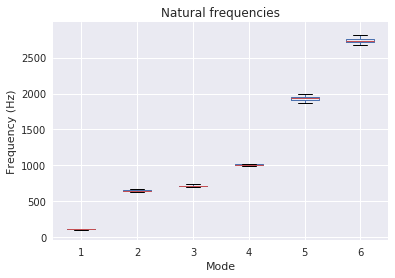

In [4]:
freq = data.drop(['error', 'finished', 'time_minutes'], axis=1)
freq.boxplot()
plt.title("Natural frequencies")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.show()

### Solution times and final errors

/home/byi649/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


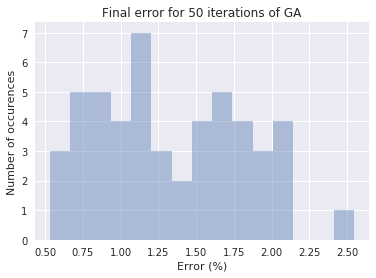

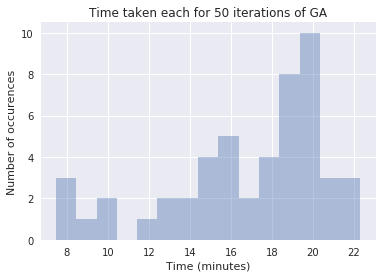

In [5]:
ax = sns.distplot(data['error'], bins=15, kde=False, norm_hist=False)
ax.set(xlabel="Error (%)", ylabel="Number of occurences", title="Final error for 50 iterations of GA")
plt.show()

ax = sns.distplot(data['time_minutes'], bins=15, kde=False, norm_hist=False)
ax.set(xlabel="Time (minutes)", ylabel="Number of occurences", title="Time taken each for 50 iterations of GA")
plt.show()

### Grouping by finish time

In [6]:
print(data['finished'].value_counts().to_string())

False    33
True     17


/home/byi649/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


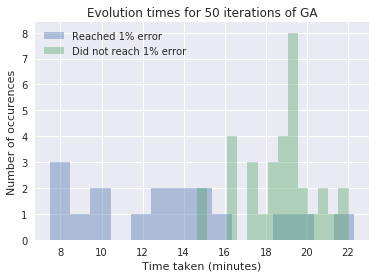

In [7]:
ax = sns.distplot(data['time_minutes'].loc[data['finished']], bins=15, kde=False, norm_hist=False, label="Reached 1% error")
sns.distplot(data['time_minutes'].loc[-data['finished']], bins=15, kde=False, norm_hist=False, label="Did not reach 1% error")
ax.set(xlabel="Time taken (minutes)", ylabel="Number of occurences", title="Evolution times for 50 iterations of GA")
plt.legend()
plt.show()